In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Aplique nas imagens abaixo o algortimo Watershed para realizar a contagem de células. Faça tanto para  a imagem original e para a imagem gradiente

In [138]:
def new_watershed_version(image):
    # Apply a Gaussian blur to the image to remove small noise
    image_blurred = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Generate the gradient image using the Sobel operator
    grad_x = cv2.Sobel(image_blurred, cv2.CV_64F, 1, 0, ksize=5)
    grad_y = cv2.Sobel(image_blurred, cv2.CV_64F, 0, 1, ksize=5)
    gradient = cv2.magnitude(grad_x, grad_y)
    
    # Normalize the gradient image to display
    gradient_norm = cv2.normalize(gradient, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    # Convert the gradient image to 8-bit for the watershed algorithm
    gradient_8bit = np.uint8(gradient_norm)
    
    # Use Otsu's method to perform global thresholding to find a threshold to separate cells from the background
    _, binary_image = cv2.threshold(gradient_8bit, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Perform a morphological operation to remove small white noises
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Find the sure background area by dilating the image
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Find the sure foreground area using the distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    
    # Find unknown region by subtracting sure foreground from sure background
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Label the sure foreground area
    _, markers = cv2.connectedComponents(sure_fg)
    
    # Add one to all labels so that the background is not 0, but 1
    markers = markers + 1
    
    # Mark the unknown region with zero
    markers[unknown == 255] = 0
    
    # Apply the watershed algorithm
    markers = cv2.watershed(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), markers)
    
    # Count the cells (each cell is represented by a different marker label, background is labeled as 1)
    cell_count = len(np.unique(markers)) - 1  # subtracting one for background
    
    # Mark the cell boundaries in the original image
    image_with_boundaries = image.copy()
    image_with_boundaries[markers == -1] = 255  # boundary regions are marked with -1
    
    # Plot the images
    fig, axes = plt.subplots(1, 3, figsize=(20, 10))
    ax = axes.ravel()
    
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original Image')
    
    ax[1].imshow(gradient_norm, cmap='gray')
    ax[1].set_title('Gradient Image')
    
    ax[2].imshow(image_with_boundaries, cmap='gray')
    ax[2].set_title('Image with Boundaries\nCell Count: {}'.format(cell_count))
    
    for a in ax:
        a.axis('off')
    
    plt.tight_layout()
    plt.show()
    


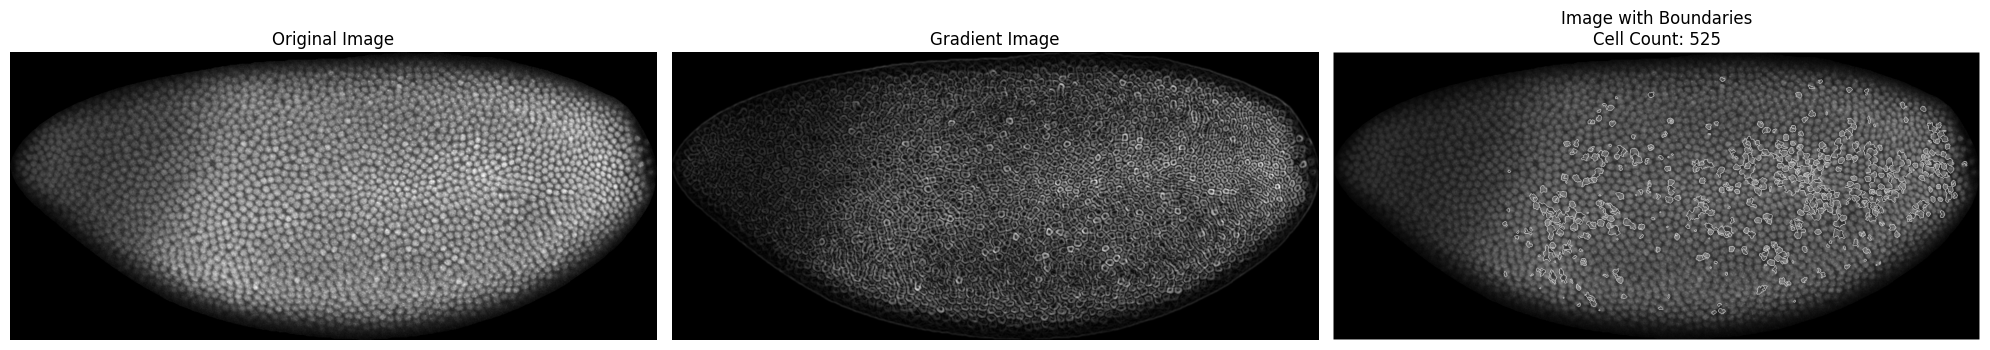

In [139]:
img1 = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)
#watershed_v3(img1)
new_watershed_version(img1)
#watershed_v4(img1)

#plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

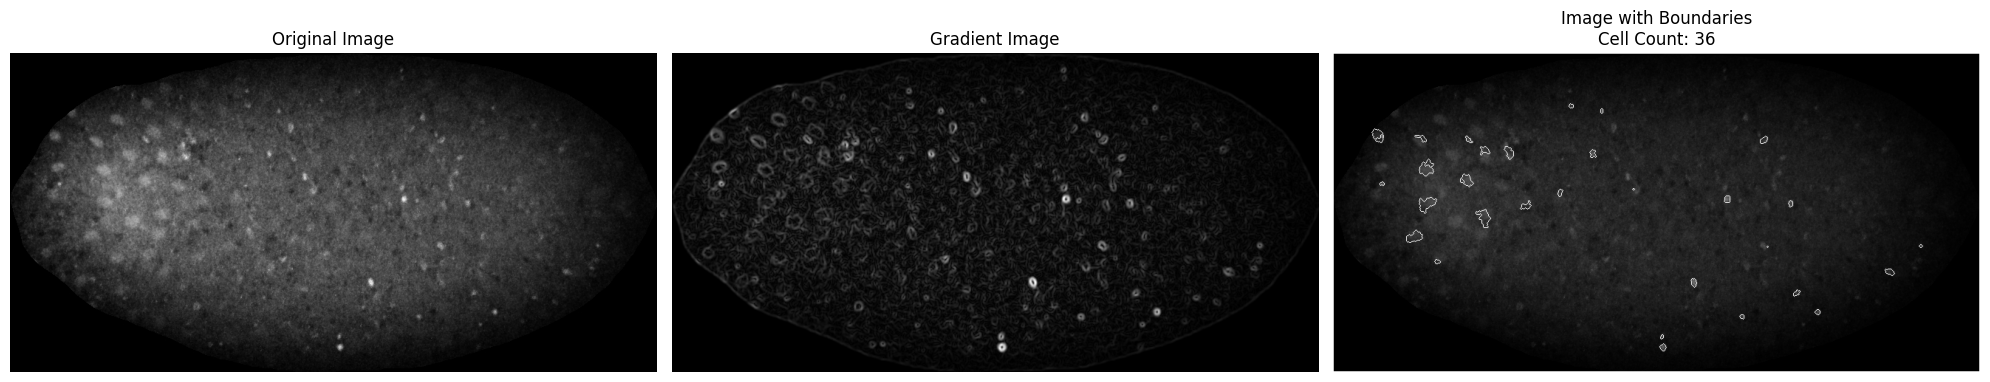

In [140]:
img2 = cv2.imread("image2.jpg", cv2.IMREAD_GRAYSCALE)

new_watershed_version(img2)
# plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

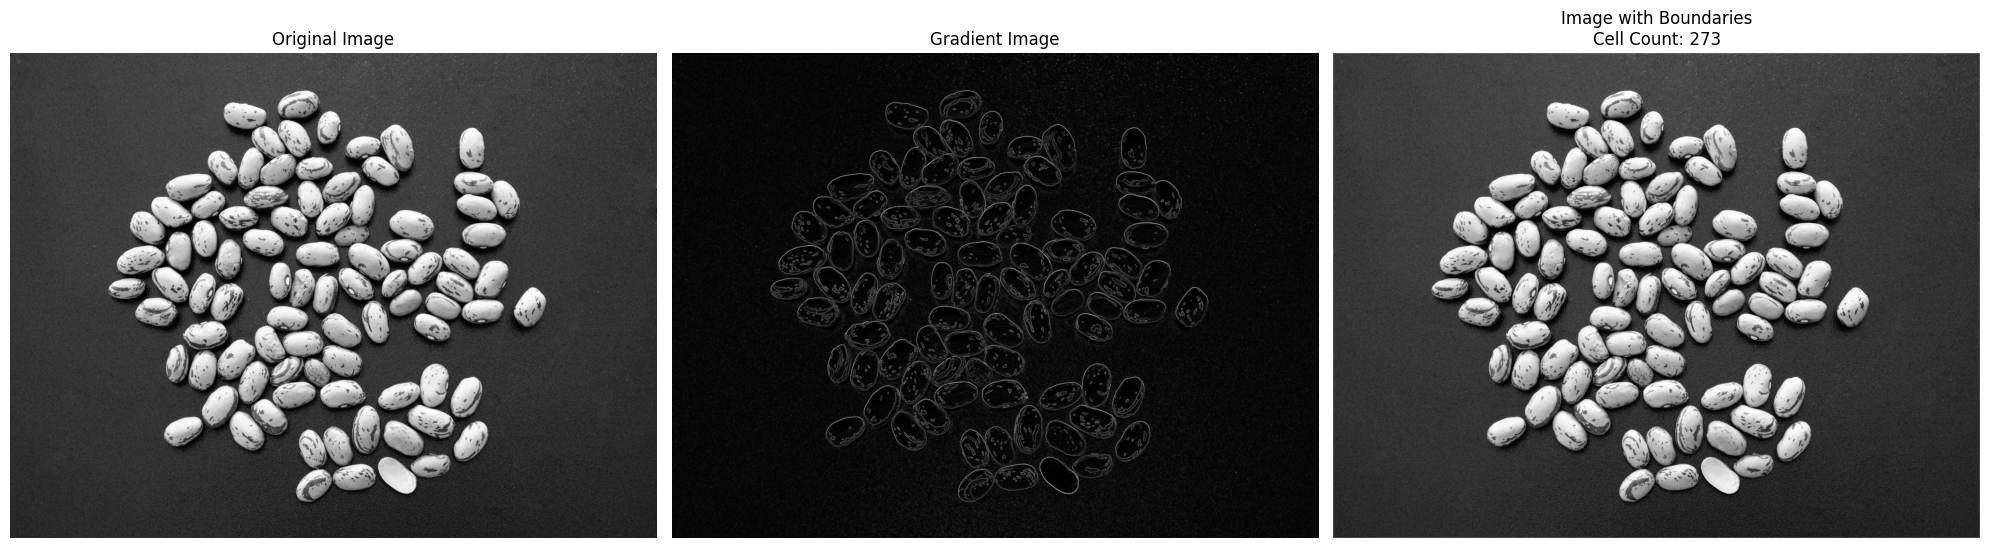

In [141]:
img3 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)
new_watershed_version(img3)

# plt.imshow(img3, cmap='gray', vmin=0, vmax=255);